# Classification of MNIST with MLP

In this example we create a simple MLP (multi layer perceptron) to classify the images in the MNIST data set.

MNIST consists of pictures of handwritten digits

In [1]:
import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


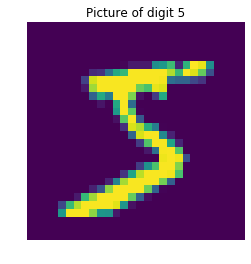

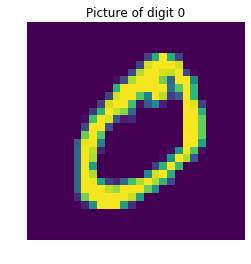

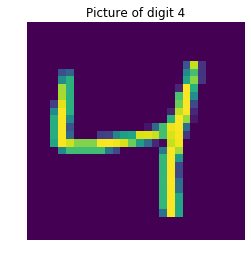

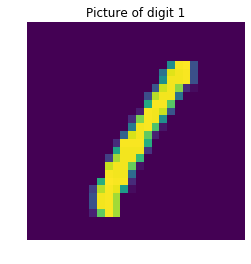

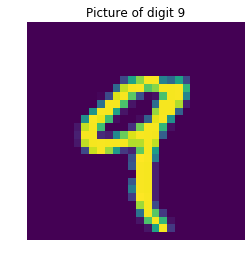

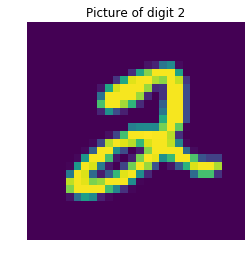

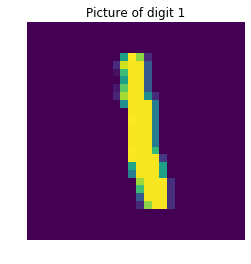

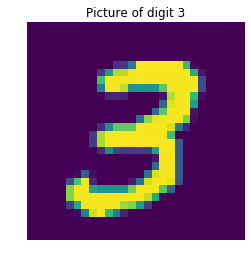

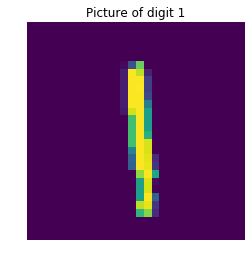

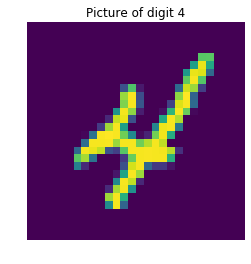

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline 

for i in range(10):
    plt.figure()
    plt.imshow(x_train[i])
    plt.title(f'Picture of digit {y_train[i]}')
    plt.axis('off')
    plt.show()


## Data preproccessing

In [4]:
# First, we flatten the images since a MLP can only handle vector inputs
# before x_train[i] was an image of size (28, 28), after flattening its
# a vector of size (784,). Since we have 60000 images the full size is (60000, 784)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# the images are stored as integers in the inverval [0, 255]
# we need to convert these to floating points
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# we also divide by 255 to make the range be [0, 1]
x_train /= 255
x_test /= 255


print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [5]:
num_classes = 10

print('Before one-hot encoding')
print(y_train.shape)
print('label:', y_train[0])

# convert class vectors to one hot encoded vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('After one-hot encoding')
print(y_train.shape)
print('label:', y_train[0])

Before one-hot encoding
(60000,)
label: 5
After one-hot encoding
(60000, 10)
label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Creating a MLP with keras



In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

In [7]:
layers = [
    Dense(512, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(512, activation='relu'),    
    Dense(num_classes, activation='softmax')
]

model = Sequential(layers)

Instructions for updating:
Colocations handled automatically by placer.


### Print model information

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Make model ready for training

You need to define the loss function, what optimizer to use, and what metric to optimize.


See more:
https://keras.io/losses/
https://keras.io/optimizers/
https://keras.io/metrics/


In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

## Now we can train our simple model


**batch size**: How many training samples to pass to the optimizer each iteration
**epoch**: The number of times the optimizer should iterate through all our training data

With batch size at 128 and 60,000 training samples we need 479 iterations to pass all the training data to the optimizer.


### What do we expect of this model?
Is there something we are not addressing? What happens if we increase the number of epochs?

In [10]:
batch_size = 128
epochs = 5

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.2200 - acc: 0.9320 - val_loss: 0.0966 - val_acc: 0.9704
Epoch 2/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.0826 - acc: 0.9751 - val_loss: 0.0773 - val_acc: 0.9760
Epoch 3/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.0541 - acc: 0.9833 - val_loss: 0.0766 - val_acc: 0.9774
Epoch 4/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.0407 - acc: 0.9873 - val_loss: 0.0869 - val_acc: 0.9760
Epoch 5/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.0292 - acc: 0.9909 - val_loss: 0.0915 - val_acc: 0.9783


In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09145910136984021
Test accuracy: 0.9783
